(appB:spectral)=
# B.2 Theoretical considerations for spectral embeddings

In [5]:
mode = "svg"

import matplotlib

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

import matplotlib
from matplotlib import pyplot as plt

In [6]:
import numpy as np
from graspologic.simulations import er_np
from graspologic.embed import AdjacencySpectralEmbed

def orthogonal_align(Xhat, p=0.5):
    return -Xhat if ((Xhat*np.sqrt(p)).sum() < 0) else Xhat

p = 0.5
ns = np.round(10**np.linspace(1.5, 3.5, 5)).astype(int)
ase = AdjacencySpectralEmbed(n_components=1)

As = [[er_np(n, p) for _ in range(50)] for n in ns]
Xhats_aligned = [[orthogonal_align(ase.fit_transform(A)) for A in An] for An in As]

In [7]:
import pandas as pd

data = []
for n_idx, n in enumerate(ns):
    for j in range(50):
        data.extend([(Xhats_aligned[n_idx][j][i][0], i, n, j, np.sqrt(p)) for i in range(n)])

df = pd.DataFrame(data, columns=["Xhat", "i", "n", "j", "X"])
df["abs_diff"] = np.abs(df["Xhat"] - df["X"])

max_pernet = df.groupby(["n", "j"])["abs_diff"].max().reset_index()
max_pernet["norm_factor"] = np.log(max_pernet["n"])**2 / np.sqrt(max_pernet["n"])
max_pernet["norm_diff"] = max_pernet["abs_diff"] / max_pernet["norm_factor"]

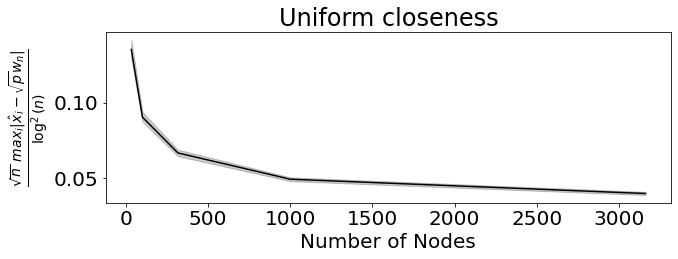

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(1,1, figsize=(10, 4))
                        
sns.lineplot(data=max_pernet, x="n", y="norm_diff", color="black", ax=ax)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("$ \\frac{\\sqrt{n}\\,\\, max_i |\\hat x_i - \\sqrt{p} w_n|}{\\log^2(n)}$")
ax.set_title("Uniform closeness")

fig.tight_layout()

os.makedirs("Figures", exist_ok=True)
fname = "spectral_unif_cl"
if mode != "png":
    os.makedirs(f"Figures/{mode:s}", exist_ok=True)
    fig.savefig(f"Figures/{mode:s}/{fname:s}.{mode:s}")

os.makedirs("Figures/png", exist_ok=True)
fig.savefig(f"Figures/png/{fname:s}.png")

In [9]:
df_reduced = df[df["j"] == 0].copy()
df_reduced["limiting_factor"] = np.sqrt(df_reduced["n"]) * (df_reduced["Xhat"] - df_reduced["X"])

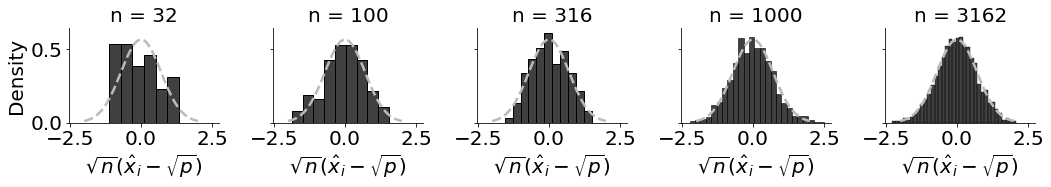

In [10]:
from scipy.stats import norm

g = sns.FacetGrid(df_reduced, col="n")
g.map(sns.histplot, "limiting_factor", stat="density", color="black")
truth = pd.DataFrame({"x" :  np.linspace(-2, 2, 100)})
truth["y"] = norm.pdf(truth["x"], scale=np.sqrt(1-p))

axes = g.fig.axes
for ax in axes:
    sns.lineplot(data=truth, x="x", y="y", ax=ax, color="#BBBBBB", linestyle="--", linewidth=2.5);
g.set_axis_labels("$\\sqrt{n}(\\hat x_i - \\sqrt{p})$");

fig = g.fig
fig.tight_layout()
fname = "spectral_asy_norm"
if mode != "png":
    fig.savefig(f"Figures/{mode:s}/{fname:s}.{mode:s}")

fig.savefig(f"Figures/png/{fname:s}.png")